Building a pandas Cheat Sheet, Part 1

Import pandas with the right name

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("07-hw-animals.csv")

Set all graphics from matplotlib to display inline

In [13]:
#!pip install matplotlib

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
#This lets your graph show you in your notebook

In [15]:
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


Display the names of the columns in the csv

In [16]:
df['name']

0          Anne
1           Bob
2    Egglesburg
3         Devon
4       Charlie
5      Fontaine
Name: name, dtype: object

Display the first 3 animals.

In [17]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


Sort the animals to see the 3 longest animals.

In [18]:
df.sort_values('length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs.

In [19]:
df['animal'].value_counts()

cat    3
dog    3
Name: animal, dtype: int64

Only select the dogs.

In [20]:
dog_df = df['animal'] == 'dog'
df[dog_df]

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


Display all of the animals that are greater than 40 cm.

In [21]:
long_animals = df['length'] > 40
df[long_animals]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


'length' is the animal's length in cm. Create a new column called inches that is the length in inches.
#1 inch = 2.54 cm

In [22]:
df['length_inches'] = df['length'] / 2.54
df

,animal,name,length,length_inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
4,cat,Charlie,32,12.598425
5,dog,Fontaine,35,13.779528


Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."

In [23]:
cats = df['animal'] == 'cat'
dogs = df['animal'] == 'dog'

Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.

In [24]:
long_animals = df['length_inches'] > 12
df[cats & long_animals]

,animal,name,length,length_inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [25]:
df[(df['length_inches'] > 12) & (df['animal'] == 'cat')]
#Amazing!

,animal,name,length,length_inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


What's the mean length of a cat?
What's the mean length of a dog
#Cats are mean but dogs are not

In [26]:
df[cats].mean()

length           37.333333
length_inches    14.698163
dtype: float64

In [27]:
df[dogs].mean()

length           50.000000
length_inches    19.685039
dtype: float64

Use groupby to accomplish both of the above tasks at once.

In [28]:
df.groupby('animal').mean()

#groupby 

,length,length_inches
animal,,
cat,37.333333,14.698163
dog,50.000000,19.685039


Make a histogram of the length of dogs. I apologize that it is so boring.

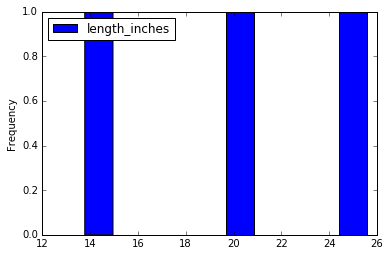

In [29]:
df[dogs].plot.hist(y='length_inches')

Change your graphing style to be something else (anything else!)

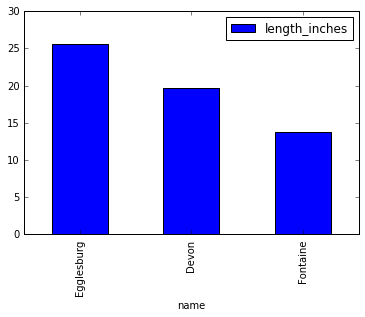

In [30]:
df[dogs].plot.bar(x='name', y='length_inches')

Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)

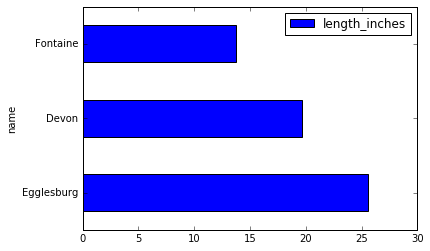

In [31]:
df[dogs].plot.barh(x='name', y='length_inches')
#Fontaine is such an annoying name for a dog

Make a sorted horizontal bar graph of the cats, with the larger cats on top.

/Users/honjingyi/.virtualenvs/data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


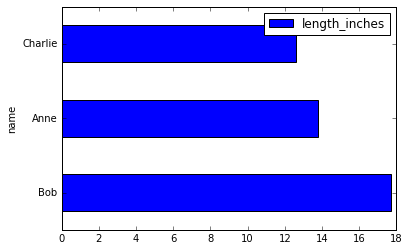

In [34]:
df[cats].sort(['length_inches'], ascending=False).plot(kind='barh', x='name', y='length_inches')

#df[df['animal']] == 'cat'].sort_values(by='length).plot(kind='barh', x='name', y='length', legend=False)